In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("drug_classification (1).csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_drug = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Drug_Type'] = le_drug.fit_transform(df['Drug_Type'])
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [4]:
X = df.drop('Drug_Type', axis=1)
y = df['Drug_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
results = []
for depth in [3, 4, 5, None]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((depth, acc))
    print(f"max_depth={depth}, Accuracy={acc:.3f}")

max_depth=3, Accuracy=0.875
max_depth=4, Accuracy=1.000
max_depth=5, Accuracy=1.000
max_depth=None, Accuracy=1.000


In [6]:
best_depth = max(results, key=lambda x: x[1])[0]
final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

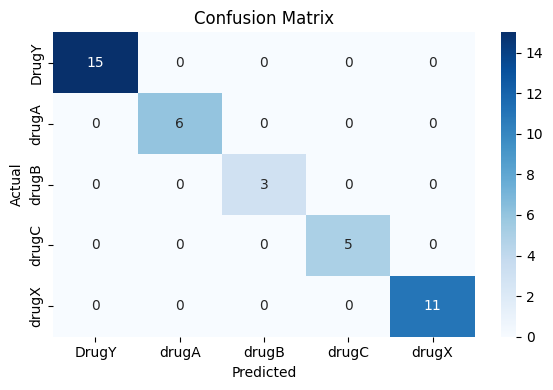

In [8]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=le_drug.classes_, yticklabels=le_drug.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [9]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le_drug.classes_))


Classification Report:

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

